# Analysis of a quantum wave packet
## Introduction
This script studies the initialization of the wavepacket and its initial properties. In what follows we will consider an harmonic potential and the wave packet of an electron. We are interested in the following properties:
* probability density
* average position
* momentum
* kinetic energy
* potential energy (for an harmonic potential)
* total energy

The first part is concerned with the theory. We manually calculate the physical quantities of interest and we use Sympy to check them. The second part provides an implementation using Numpy. The physical quantities are again computed but this time numerically. Finally, a comparison between the theory and the numerical results if performed.

In [1]:
import numpy as np
import sympy as sp
from sympy import simplify, factor
sp.init_printing()  # Init pretty print as default

## Theory
### First properties
We initialize the wavefunction with a wavepacket centered in $x_0$ spatially localized within $\sigma$ of $x_0$ with an initial momentum $p_0$:

\begin{align}
\psi(x,t=0) = \psi(x) = &
\frac{1}{(2\pi)^{1/4} \sqrt{\sigma}}
e^{- \frac 1 2 \frac{(x-x_0)^2}{2\sigma^2}} 
e^{i p_0(x-x_0)/\hbar} \\
|\psi|^2= &
\frac{1}{\sigma \sqrt{2 \pi}}
e^{- \frac{(x-x_0)^2}{2\sigma^2}}
\end{align}

Notice that $|\psi|^2$ is the expression of the probability density function (PDF) of a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) $\mathcal N (x_0, \sigma^2)$, which will prove useful to compute integrals.

We can first check that the wave packet is indeed normalized. This is also coherent with the fact that $|\psi|^2$ is a PDF.
\begin{equation}
\int_\mathbb{R} |\psi|^2 dx = 1
\end{equation}

Secondly, the average position is easily calculated, again thanks to the properties of the normal distribution:
\begin{equation}
\left\langle x \right\rangle = \int_\mathbb{R} x |\psi|^2 dx = x_0
\end{equation}

### Momentum
Let us now turn our attention to the average momentum. The associated observable is $\hat{p} = \frac{\hbar}{i} \frac{d}{dx}$. We can compute the following expressions:

\begin{align}
\frac{d\psi}{dx} = & \left(- \frac{x-x_0}{2 \sigma^2} + i \frac{p_0}{\hbar}\right) \psi\\
= & \left(i \frac{p_0}{\hbar} - \frac{x-x_0}{2 \sigma^2} \right) \psi\\
\frac{\hbar}{i} \frac{d}{dx} = & \left(p_0 + i \hbar \frac{x-x_0}{2 \sigma^2} \right) \psi
\end{align}

Let us use sympy to check the result of the first derivative:

In [2]:
# Define some symbols
x, x0, sigma, hbar, m, w = sp.symbols('x x_0 sigma \hbar m omega', real = True, positive = True)
p0 = sp.symbols('p_0', real=True)
pi = sp.pi
i = sp.I

psi = 1/((2*sp.pi)**sp.Rational(1,4) * sp.sqrt(sigma)) * sp.exp(-sp.Rational(1,2) * (x-x0)**2/(2*sigma**2)) * sp.exp(i*p0*(x-x0)/hbar)
psi2 = sp.Abs(psi)**2

dpsidx = simplify(sp.diff(psi, x))
dpsidx_theory = psi*(i*p0/hbar - (x-x0)/(2*sigma**2))

We can check that the expression derived previously are correct by looking at the difference of our expression and the one computed by sympy, and the result should be 0:

In [3]:
simplify(dpsidx_theory-dpsidx)

We can then compute the average momentum:
\begin{align}
\left\langle p \right\rangle = & \int_\mathbb{R} \psi^* \frac{\hbar} i \frac{d\psi}{dx} dx = \int_\mathbb{R} \left(p_0 + i \hbar \frac{x-x_0}{2 \sigma^2} \right) |\psi|^2 dx\\
= & p_0 \int_\mathbb{R} |\psi|^2 dx + 
\frac{i \hbar}{2 \sigma} \left( \int_\mathbb{R} x |\psi|^2 dx - x_0 \int_\mathbb{R}|\psi|^2 dx \right) \\
= & p_0 + \frac{i \hbar}{2 \sigma} (x_0 - x_0 \times 1) = p_0
\end{align}

Below is the result from sympy for comparison:

In [4]:
sp.integrate(sp.conjugate(psi) * hbar/i * dpsidx, (x, -sp.oo, sp.oo))

#### Kinetic energy
We can then turn our attention to the kinetic energy. Since the observable is $\hat{E_c} = \frac{1}{2m} \hat{p}^2 =  \frac{-\hbar^2}{2m} \frac{d^2}{dx^2}$, we first need to compute the second derivative $\frac{d^2\psi}{dx^2}$. This is fairly easy since we know that $\frac{d\psi}{dx} = \left(i \frac{p_0}{\hbar} - \frac{x-x_0}{2 \sigma^2} \right) \psi$:

\begin{align}
\frac{d^2\psi}{dx^2} = & - \frac{1}{2\sigma^2} \psi(x) + \left(i \frac{p_0}{\hbar} - \frac{x-x_0}{2 \sigma^2} \right) \frac{d\psi}{dx} \\
= & - \frac{1}{2\sigma^2} \psi(x) + \left(i \frac{p_0}{\hbar} - \frac{x-x_0}{2 \sigma^2} \right)^2 \psi \\
= &  \left(- \frac{1}{2\sigma^2} - \frac{p_0^2}{\hbar^2} -2i \frac{p_0}{\hbar} \frac{x-x_0}{2\sigma^2} + \left(\frac{x-x_0}{2\sigma^2} \right)^2 \right) \psi(x)\\
= & \left(- \left(\frac{p_0^2}{\hbar^2} + \frac{1}{2\sigma^2} \right) + \left(\frac{x-x_0}{2\sigma^2} \right)^2 -2i \frac{p_0}{\hbar} \frac{x-x_0}{2\sigma^2} \right) \psi(x)
\end{align}

Once again let us use sympy to check the result of the second derivative:

In [5]:
d2psidx2 = simplify(sp.diff(dpsidx, x))
d2psidx2_theory = psi * (-(p0**2/hbar**2 + 1 / (2*sigma**2)) + (x-x0)**2/(2*sigma**2)**2 -2*i*p0/hbar*(x-x0)/(2*sigma**2))
simplify(d2psidx2_theory-d2psidx2)

We are now in a position to compute the average kinetic energy:

\begin{align}
\left\langle E_c \right\rangle
= & \frac{-\hbar^2}{2m} \int_\mathbb{R} \psi^* \left(- \left(\frac{p_0^2}{\hbar^2} + \frac{1}{2\sigma^2} \right) + \left(\frac{x-x_0}{2\sigma^2} \right)^2 -2i \frac{p_0}{\hbar} \frac{x-x_0}{2\sigma^2} \right) \psi(x) dx \\
= & \frac{-\hbar^2}{2m} \int_\mathbb{R} \left(- \left(\frac{p_0^2}{\hbar^2} + \frac{1}{2\sigma^2} \right) + \left(\frac{x-x_0}{2\sigma^2} \right)^2 -2i \frac{p_0}{\hbar} \frac{x-x_0}{2\sigma^2} \right) |\psi(x)|^2 dx \\
= & \frac{\hbar^2}{2m} \left(\frac{p_0^2}{\hbar^2} + \frac{1}{2\sigma^2} \right) \int_\mathbb{R} |\psi(x)|^2 dx 
- \frac{\hbar^2}{2m} \frac{1}{4 \sigma^4} \int_\mathbb{R} \left(x-x_0\right)^2 |\psi(x)|^2 dx 
+ \frac{\hbar^2}{2m} 2i \frac{p_0}{\hbar} \frac{1}{2\sigma^2} \int_\mathbb{R} \left(x-x_0 \right) |\psi(x)|^2 dx\\
= & \left(\frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \frac{1}{2\sigma^2} \right) \int_\mathbb{R} |\psi(x)|^2 dx 
- \frac{\hbar^2}{2m} \frac{1}{4 \sigma^4} \int_\mathbb{R} \left(x-x_0\right)^2 |\psi(x)|^2 dx \\
= & \frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \frac{1}{2\sigma^2}
- \frac{\hbar^2}{2m} \frac{1}{4 \sigma^4} \sigma^2 \\
= & \frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \left( \frac{1}{2\sigma^2} - \frac{1}{4 \sigma^2}\right) \\
= & \frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \frac{1}{4\sigma^2}
\end{align}

Let's see what sympy has to say:

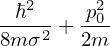

In [6]:
sp.integrate(sp.conjugate(psi) * (-hbar**2/(2*m)) * d2psidx2, (x, -sp.oo, sp.oo))

#### Potential energy
Given an harmonic potential $V(x) = \frac 1 2 m \omega^2 (x-x_0)^2$ centered in $x_0$, the average potential energy is easy to find:

\begin{align}
\left\langle V \right\rangle = & \int_\mathbb{R} \psi^* V(x) \psi dx 
= \int_\mathbb{R} \psi^* \frac 1 2 m \omega^2 (x-x_0)^2 \psi dx\\
= & \int_\mathbb{R}\frac 1 2 m \omega^2 (x-x_0)^2 |\psi|^2 dx 
= \frac 1 2 m \omega^2  \int_\mathbb{R}(x-x_0)^2 |\psi|^2 dx\\
= & \frac 1 2 m \omega^2 \sigma^2
\end{align}

Let's check with sympy:

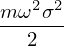

In [7]:
V = sp.Rational(1,2) * m * w**2 * (x-x0)**2
sp.integrate(sp.conjugate(psi) * V *psi, (x, -sp.oo, sp.oo))

#### Total energy
The total energy $\mathcal E$ is the sum of the kinetic energy and the potential energy. Hence:

\begin{align}
\mathcal E = &\left\langle E_c \right\rangle + \left\langle V \right\rangle \\
= & \frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \frac{1}{4\sigma^2} + \frac 1 2 m \omega^2 \sigma^2
\end{align}

## Implementation
### Simulation parameters
The settings below define the characteristics of the spatial grid used.

In [8]:
Nx = 1000                                          # Number of grid points
x_start = 000e-9                                   # Position to start the computations from
x_end = 100e-9                                     # Position at which to end the computations
x = np.linspace(x_start,x_end,Nx, dtype="float128") # Position vector
dx = x[2] - x[1]                                   # Spatial precision
dx

1.00100100100100100176e-10

### Physical constants
We choose to study the behavior of an electron for instance in silicon. Hence we use its effective mass instead of the normal mass.

In [9]:
me = 9.10938291e-31    # Electron mass
meff = 0.19*me          # Electron effective mass
m = meff

hbar = 1.054571726e-34 # Reduced Planck's constant
e = 1.602176565e-19    # Elementary charge
h = hbar*2*np.pi       # Planck's constant

### Potential characteristic
We assume an harmonic potential with a level spacing of $\Delta E = 10$ meV. The energy levels of an harmonic oscillator are given by $E_n = \left(n + \frac 1 2 \right) \hbar \omega$, so the level spacing is $\Delta E = \hbar \omega$, which gives us the value of the parameter $\omega$ to use. Note the $e$ factor when defining `omega` to convert `deltaE` in Joules.

In [10]:
deltaE = 10e-3            # Level spacing of the QD (eV)
omega = e*deltaE / hbar   # s^-1

Now that $\omega$ is defined, we can compute the energy levels, for instance $E_0 = \frac{\hbar \omega}{2}$:

In [11]:
E_0 = hbar*omega/2
E_0

Which converted in meV gives:

In [12]:
E_0 / e * 1e3

### Wave packet initialization
The code below defines the center $x_0$ of the wave packet and its spatial width.

In [13]:
x0 = 25e-9                                                        # Position of the center
sigma = 10e-9                                                     # Width of the Gaussian

How to choose the value of the momentum ? We can try setting the speed of the wave packet $v$ which then determines the momentum as $p = mv$. However, let us try to find the momentum such that the energy of the wave packet is exactly that of the ground state of the harmonic oscillator $E_0$. 

From the previous section, the total energy of the wave packet is $\mathcal E = \left\langle E_c \right\rangle + \left\langle V \right\rangle$ which depends on $p_0$. We can inverse that relation to get $p_0$:

\begin{align}
\mathcal E = & \frac{p_0^2}{2m} + \frac{\hbar^2}{2m} \frac{1}{4\sigma^2} + \frac 1 2 m \omega^2 \sigma^2 \\
2m \mathcal E = & p_0^2 + \frac{\hbar^2}{4\sigma^2} + m^2 \omega^2 \sigma^2 \\
p_0^2 = & 2m \mathcal E - \frac{\hbar^2}{4\sigma^2} - m^2 \omega^2 \sigma^2
\end{align}

For $\mathcal E = E_0= \frac{\hbar \omega}{2}$, we get:

\begin{align}
p_0^2 = & 2m \frac{\hbar \omega}{2} - \frac{\hbar^2}{4\sigma^2} - m^2 \omega^2 \sigma^2\\
p_0^2 = & m \hbar \omega - \frac{\hbar^2}{4\sigma^2} - m^2 \omega^2 \sigma^2\\
\end{align}

When is this quantity positive ? Let's look at each term:

In [14]:
m*hbar*omega, hbar**2/(4*sigma**2), m**2 * omega**2 * sigma**2

We conclude that with our choice of parameters $\omega$ and $\sigma$, the momentum is not real. Let us see what values are better visually. We will draw the surface of equation $p_0^2$ with $\omega$ and $\sigma$ varying and see when this is greater than 0.

<IPython.core.display.Javascript object>


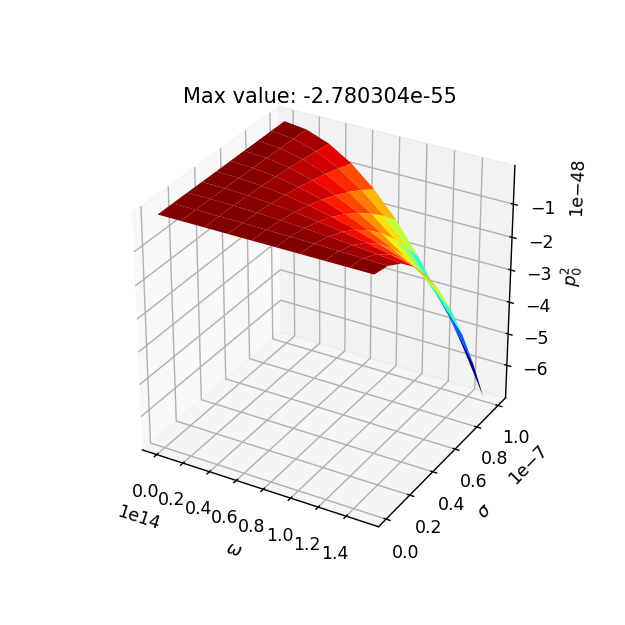

In [74]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
from matplotlib import cm

def p0_squared(omega, sigma):
    return m*hbar*omega - hbar**2/(4*sigma**2) - m**2 * omega**2 * sigma**2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
deltaE_range = np.linspace(0, 100, 10) * 1e-3
omega_range = e*deltaE_range / hbar
sigma_range = np.linspace(1e-9, 100e-9, 10)
X, Y = np.meshgrid(omega_range, sigma_range)
zs = np.array(p0_squared(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.jet)

ax.set_xlabel('$\omega$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$p_0^2$')
plt.title("Max value: %e" % max(zs))
plt.show()

In [72]:
p0 = m * 1e-9 * 1e-9/1e-12

The value of the momentum is quite abstract. However wavelength and group velocity are easier to understand. Luckily we can get these two values very easily from the momentum. The associated wavelength and group velocity are given below in nm and nm/ps respectively:

In [16]:
wavelength = 2*np.pi*hbar/p0
v = p0/m 
wavelength * 1e9, v * 1e9/1e12

Finally, we define the wave function $\psi$ and its associated probability density $|\psi|^2$:

In [17]:
psi = 1/((2*np.pi)**(1/4)*np.sqrt(sigma)) * np.exp(-1/2 *(x-x0)**2/(2*sigma**2)) * np.exp(1j*p0*(x-x0)/hbar)
prob = abs(psi)**2

### Verification of theoretical properties
What follow are some checks to verify the initial conditions of the wavepacket. We begin by computing derivatives of the wavefunction:

In [18]:
# First spatial derivative of psi
dpsi0dx = np.zeros(Nx, dtype="complex256")
# dpsi0dx(1:Nx-1) = (psi(2:Nx) - psi(1:Nx-1)) / dx
# dpsi0dx(1) = (psi(2) - psi(1)) / (dx)
dpsi0dx[2:Nx-1] = (psi[3:Nx] - psi[1:Nx-2]) / (2*dx)
# dpsi0dx(Nx) = (psi(Nx) - psi(Nx-1)) / (dx)

# Second spatial derivative of psi
d2psi0dx2 = np.zeros(Nx, dtype="complex256")
# d2psi0dx2(1:Nx-1) = (dpsi0dx(2:Nx) - dpsi0dx(1:Nx-1)) / dx
# d2psi0dx2(1) = (dpsi0dx(2) - dpsi0dx(1)) / dx
d2psi0dx2[2:Nx-1] = (dpsi0dx[3:Nx] - dpsi0dx[1:Nx-2]) / (2*dx)
# d2psi0dx2(Nx) = (dpsi0dx(Nx) - dpsi0dx(Nx-1)) / dx

We can then check the physical quantities we computed in the theory section:

In [19]:
total_probability = np.trapz(prob * dx)
total_probability

0.99378996877180826765

In [20]:
average_position = np.trapz(x * prob * dx);
x0, average_position

(2.5e-08, 2.5020039908209068836e-08)

In [21]:
average_momentum = np.trapz(np.conj(psi) * hbar / 1j * dpsi0dx * dx);
p0, average_momentum

(1.7307827529000001e-37, (1.7195488195355279624e-37+9.594754951586863072e-29j))

In [22]:
kinetic_energy = p0**2/(2*m) + hbar**2/(2*m) * 1/(4*sigma**2)
average_kinetic_energy = np.trapz(np.conj(psi) * -hbar**2/(2*m) * d2psi0dx2 * dx)
kinetic_energy, average_kinetic_energy

(8.031926041954226e-23, (7.978957460834612074e-23+4.857173437671517596e-35j))

In [23]:
potential_energy = 1/2 * m * omega**2 * sigma**2
V = 1/2 * m * omega**2 * (x-x0)**2
average_potential_energy = np.trapz(V * prob * dx)
potential_energy, average_potential_energy

(1.9974736850373786e-21, 1.897536138239393811e-21)

In [24]:
total_energy = kinetic_energy + potential_energy;
average_total_energy = average_kinetic_energy + average_potential_energy;
E_0, total_energy, average_total_energy

(8.010882825e-22,
 2.077792945456921e-21,
 (1.9773257128477399318e-21+4.857173437671517596e-35j))

## Conclusion
Globally, all physical quantities follow the theoretical predictions for any good momentum. However, the problem is choosing the initial value of the momentum depending on the parameters (namely $\sigma$ and $\Delta E$). There also seems to be an influence on the precision depending on the value of $p_0$.